In [3]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [4]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

In [6]:
master = pd.read_csv("../shared_data_read_only/Education-Data/2023-2024 Master School List (20231003).csv")
metric = pd.read_csv("../shared_data_read_only/Education-Data/SPREE_SY2122_School_Metric_Scores.csv")

In [7]:
master.head()

,PA Code,NSC Code,NCES Code,AUN Code,ULCS Code,SRC School ID,School Name (ULCS),Publication Name,Publication Name Alpha List,Abbreviated Name,...,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12
0,3847.0,393345,4.218990e+11,126515001.0,1010,101,JOHN BARTRAM HIGH SCHOOL,John Bartram High School,"Bartram, John High School",Bartram,...,0,0,0,0,0,0,1,1,1,1
1,3860.0,393555,4.218990e+11,126515001.0,1020,102,WEST PHILADELPHIA HIGH SCHOOL,West Philadelphia High School,West Philadelphia High School,West Philadelphia,...,0,0,0,0,0,0,1,1,1,1
2,7903.0,392779,4.218990e+11,126515001.0,1030,103,HIGH SCHOOL OF THE FUTURE,High School of the Future,High School of the Future,HS of Future,...,0,0,0,0,0,0,1,1,1,1
3,7780.0,393347,4.218990e+11,126515001.0,1050,105,PAUL ROBESON HIGH SCHOOL,Paul Robeson High School for Human Services,"Robeson, Paul High School for Human Services",Robeson,...,0,0,0,0,0,0,1,1,1,1
4,7245.0,393944,4.218990e+11,126515001.0,1100,110,SAYRE HIGH SCHOOL,William L. Sayre High School,"Sayre, William L. High School",Sayre,...,0,0,0,0,0,0,1,1,1,1


In [8]:
master[['Latitude', 'Longitude']] = master['GPS Location'].str.split(',', expand=True).astype(float)

In [9]:
master

,PA Code,NSC Code,NCES Code,AUN Code,ULCS Code,SRC School ID,School Name (ULCS),Publication Name,Publication Name Alpha List,Abbreviated Name,...,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,Latitude,Longitude
0,3847.0,393345,4.218990e+11,126515001.0,1010,101,JOHN BARTRAM HIGH SCHOOL,John Bartram High School,"Bartram, John High School",Bartram,...,0,0,0,0,1,1,1,1,39.921497,-75.234056
1,3860.0,393555,4.218990e+11,126515001.0,1020,102,WEST PHILADELPHIA HIGH SCHOOL,West Philadelphia High School,West Philadelphia High School,West Philadelphia,...,0,0,0,0,1,1,1,1,39.958110,-75.219654
2,7903.0,392779,4.218990e+11,126515001.0,1030,103,HIGH SCHOOL OF THE FUTURE,High School of the Future,High School of the Future,HS of Future,...,0,0,0,0,1,1,1,1,39.974658,-75.204757
3,7780.0,393347,4.218990e+11,126515001.0,1050,105,PAUL ROBESON HIGH SCHOOL,Paul Robeson High School for Human Services,"Robeson, Paul High School for Human Services",Robeson,...,0,0,0,0,1,1,1,1,39.956796,-75.204763
4,7245.0,393944,4.218990e+11,126515001.0,1100,110,SAYRE HIGH SCHOOL,William L. Sayre High School,"Sayre, William L. High School",Sayre,...,0,0,0,0,1,1,1,1,39.957594,-75.238594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,NaN,390081,NaN,126515001.0,8860,886,ONE BRIGHT RAY MANSION ACCEL,One Bright Ray Mansion,One Bright Ray Mansion,OBR Mansion,...,0,0,0,0,1,1,1,1,39.990744,-75.184025
325,NaN,A26193,NaN,126515001.0,8870,887,ONE BRIGHT RAY MANSION EVENING,One Bright Ray Mansion Evening,One Bright Ray Mansion Evening,OBR Mansion Evn,...,0,0,0,0,1,1,1,1,39.990744,-75.184025
326,NaN,390035,NaN,126515001.0,8890,889,ONE BRIGHT RAY-SIMPSON CAMPUS,One Bright Ray - Simpson Campus,One Bright Ray - Simpson,OBR Simpson,...,0,0,0,0,1,1,1,1,40.005280,-75.105601
327,NaN,NaN,NaN,126515001.0,8891,NaN,ONE BRIGHT RAY SIMPSON - EVENING,One Bright Ray Simpson - Evening,One Bright Ray Simpson - Evening,OBR Simpson Evn,...,0,0,0,0,1,1,1,1,40.005261,-75.105608


In [10]:
columns_to_keep = ['Publication Name', 'Major Intervention', "Latitude", "Longitude"]
major_intervention = master.drop(columns=master.columns.difference(columns_to_keep))

In [11]:
major_intervention.head()

,Publication Name,Major Intervention,Latitude,Longitude
0,John Bartram High School,Academic Improvement Plan,39.921497,-75.234056
1,West Philadelphia High School,Acceleration,39.958110,-75.219654
2,High School of the Future,NaN,39.974658,-75.204757
3,Paul Robeson High School for Human Services,NaN,39.956796,-75.204763
4,William L. Sayre High School,NaN,39.957594,-75.238594


In [12]:
major_intervention = major_intervention.dropna(axis=0,how='any')

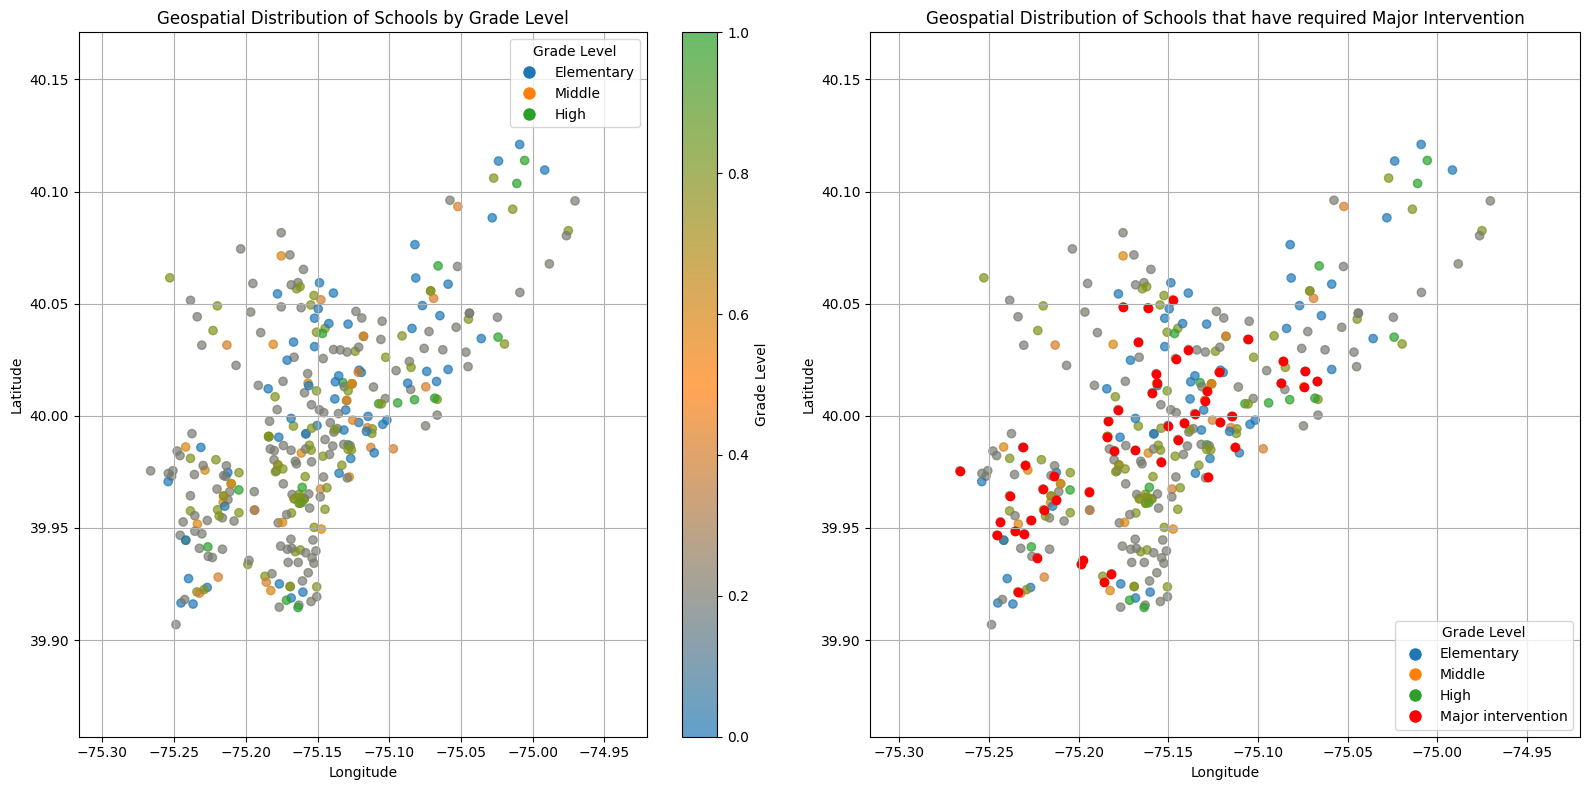

In [13]:
# Show locations of each school & the schools that require major intervention

# Define custom color palette for elementary, middle, and high schools
color_elementary = (0.12, 0.47, 0.71)  # blue
color_middle = (1.00, 0.50, 0.05)       # orange
color_high = (0.17, 0.63, 0.17)          # green

# Function to interpolate colors between two given colors
def interpolate_color(color1, color2, n=10):
    r = np.linspace(color1[0], color2[0], n)
    g = np.linspace(color1[1], color2[1], n)
    b = np.linspace(color1[2], color2[2], n)
    return np.column_stack((r, g, b))

# Create a linear segmented colormap for the gradient
interpolated_colors = interpolate_color(color_elementary, color_middle, n=50)
interpolated_colors = np.vstack([interpolated_colors, interpolate_color(color_middle, color_high, n=50)])
cmap = LinearSegmentedColormap.from_list('grade_levels', interpolated_colors)

# Create a figure and two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Scatter plot for the first subplot
sc1 = axs[0].scatter(master['Longitude'], master['Latitude'], c=master['School Level'].map({'Elementary': 0, 'Elementary-Middle': 0.2, 'Middle': 0.4, 'Middle-High': 0.6, 'High': 0.8, 'Elementary-Middle-High':1}),
                 cmap=cmap, alpha=0.7)

# Scatter plot for the second subplot
sc2 = axs[1].scatter(master['Longitude'], master['Latitude'], c=master['School Level'].map({'Elementary': 0, 'Elementary-Middle': 0.2, 'Middle': 0.4, 'Middle-High': 0.6, 'High': 0.8, 'Elementary-Middle-High':1}),
                 cmap=cmap, alpha=0.7)
axs[1].scatter(major_intervention['Longitude'], major_intervention['Latitude'],c='red')

# Add color bar to the second subplot
cbar = plt.colorbar(sc1, ax=axs[0])
cbar.set_label('Grade Level')

# Add labels and title to both subplots
for ax in axs:
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_xlim(master['Longitude'].min()-0.05, master['Longitude'].max()+0.05)
    ax.set_ylim(master['Latitude'].min()-0.05, master['Latitude'].max()+0.05)
    ax.grid(True)

axs[0].set_title('Geospatial Distribution of Schools by Grade Level')
axs[1].set_title('Geospatial Distribution of Schools that have required Major Intervention')

# Add legend to the first subplot
legend_labels = {'Elementary': color_elementary, 'Middle': color_middle, 'High': color_high}
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in legend_labels.items()]
axs[0].legend(handles=handles, labels=legend_labels.keys(), loc='upper right', title='Grade Level')
legend_labels2 = {'Elementary': color_elementary, 'Middle': color_middle, 'High': color_high, 'Major intervention': (1,0,0)}
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in legend_labels2.items()]
axs[1].legend(handles=handles, labels=legend_labels2.keys(), loc='lower right', title='Grade Level')


# Display the plot
plt.tight_layout()
plt.show()


In [14]:
metric['metric_score'] = pd.to_numeric(metric['metric_score'], errors='coerce')
metric_w_score = metric.dropna(subset=['metric_score'])

In [15]:
metric_w_score

,school_id,school_name,accountability_year,report_type,metric,numerator,denominator,metric_score,tier
1,1010,John Bartram High School,2021-2022,High School,"% of Students Not Participating in AP, IB, or ...",112.0,112.0,100.0,NaN
2,1010,John Bartram High School,2021-2022,High School,% of Students Participating but Not Passing AP...,0.0,112.0,0.0,NaN
3,1010,John Bartram High School,2021-2022,High School,"% of Students Meeting Standard on AP Exam, on ...",0.0,112.0,0.0,NaN
4,1010,John Bartram High School,2021-2022,High School,"Disproportionality in AP, IB, and Dual Enrollm...",NaN,NaN,0.9,NaN
6,1010,John Bartram High School,2021-2022,High School,"Disproportionality in AP, IB, and Dual Enrollm...",NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...
82613,8770,John Hancock Demonstration School,2021-2022,K-8 School,Within-Year Reading Assessments: % of Students...,130.0,256.0,50.8,NaN
82614,8770,John Hancock Demonstration School,2021-2022,K-8 School,% of Students Participating in Within-Year Rea...,431.0,441.0,97.7,NaN
82616,8770,John Hancock Demonstration School,2021-2022,K-8 School,% of Students Participating in Within-Year Rea...,256.0,262.0,97.7,NaN
82617,8770,John Hancock Demonstration School,2021-2022,K-8 School,Within-Year Math Assessments: % of Students At...,124.0,448.0,27.7,NaN


In [ ]:
unique_school_ids = metric_w_score['school_id'].unique()
columns_to_keep = ['Publication Name', 'Major Intervention', "Latitude", "Longitude"]


# Create a dictionary to store DataFrames for each school
school_dataframes = {}

# Iterate over unique school IDs
for school_id in unique_school_ids:
    # Filter the DataFrame for the current school ID
    school = metric_w_score[metric_w_score['school_id'] == school_id]
    
    # Store the filtered DataFrame in the dictionary with the school ID as the key
    school_dataframes[school_id] = school
    major_intervention = master.drop(columns=master.columns.difference(columns_to_keep))

          school_id     numerator   denominator  metric_score
count  82621.000000  13790.000000  18111.000000  21066.000000
mean    4514.194357    102.754242    244.708188     45.622126
std     2084.764238    177.312326    314.591573    115.890050
min     1010.000000      0.000000      0.000000      0.000000
25%     3321.000000      7.000000     22.000000      4.700000
50%     3440.000000     32.000000    117.000000     15.900000
75%     6250.000000    116.000000    383.000000     54.100000
max     8770.000000   3109.000000   3468.000000   3468.000000


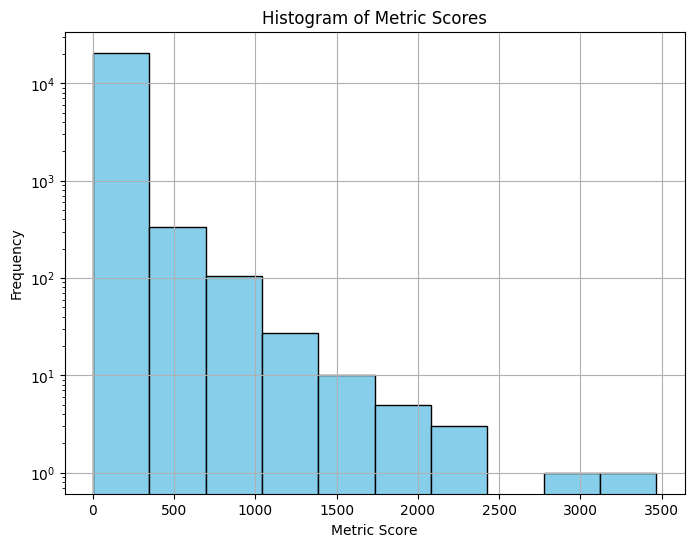

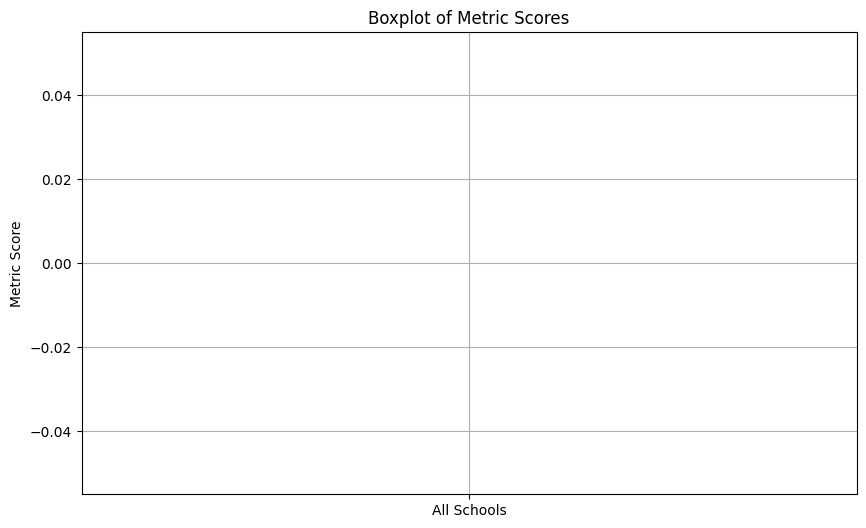

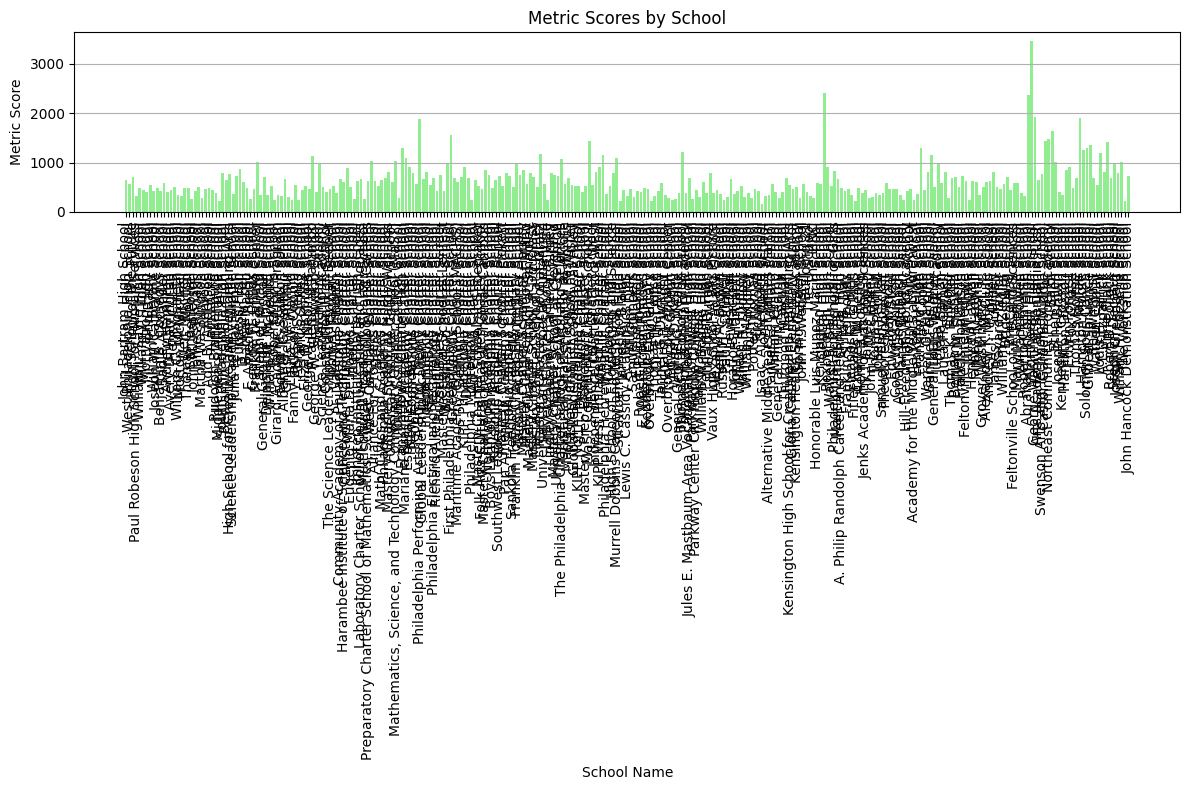

In [16]:

# Convert numerical columns to numeric data types
metric['numerator'] = pd.to_numeric(metric['numerator'], errors='coerce')
metric['denominator'] = pd.to_numeric(metric['denominator'], errors='coerce')

print(metric.describe())

# Histogram of metric scores
plt.figure(figsize=(8, 6))
plt.hist(metric['metric_score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Metric Scores')
plt.xlabel('Metric Score')
plt.ylabel('Frequency')
plt.yscale("log")
plt.grid(True)
plt.show()

# Box plot of metric scores by school
plt.figure(figsize=(10, 6))
plt.boxplot(metric['metric_score'])
plt.title('Boxplot of Metric Scores')
plt.ylabel('Metric Score')
plt.xticks([1], ['All Schools'])
plt.grid(True)
plt.show()

# Bar plot of metric scores by school
plt.figure(figsize=(12, 8))
plt.bar(metric['school_name'], metric['metric_score'], color='lightgreen')
plt.title('Metric Scores by School')
plt.xlabel('School Name')
plt.ylabel('Metric Score')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()